In [4]:
import numpy as np
# import seaborn as sns 
import matplotlib.pyplot as plt
from importlib import reload
import utils.misc as mutil
reload(mutil);

In [15]:
def plot_regrets_all_noise_levels(arrival_rate, noise_variance_list, plot_style, show_theoretical):
    for index, noise_variance in enumerate(noise_variance_list):
        current_result = np.load('./results/regret-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')
        plt.plot(current_result[0,:], current_result[1,:] - current_result[2,:], plot_style[index], ms = 7.5, label = '$\sigma$ = ' + str(noise_variance))
        
        if(show_theoretical[index]):
            theoretical_regret = mutil.fit_regret_curve(current_result[0,:], current_result[1,:] - current_result[2,:], start_index = 6)
            plt.plot(current_result[0,:], theoretical_regret, '--', label = 'thrtcl = ' + str(noise_variance))
        
    plt.xlabel('Time horizon $T$')
    plt.ylabel('Regret $R^{\pi_D}(T)$')
    plt.legend()
    plt.show()

def plot_theoretical_regret(arrival_rate, noise_variance):
    current_result = np.load('./results/regret-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')
    numerical_regret = current_result[1,:] - current_result[2,:]
    theoretical_regret = mutil.fit_regret_curve(current_result[0,:], numerical_regret, start_index = 6)
    plt.plot(current_result[0,:], numerical_regret, '-o', color='C0', label = 'numerical regret')
    plt.plot(current_result[0,:], theoretical_regret, '--', color='C3', label = 'theoretical regret')
    plt.xlabel('Time horizon $T$')
    plt.ylabel('Regret $R^{\pi_D}(T)$')
    plt.legend()
    plt.show()

In [21]:
noise_variance_list = [0, 0.01, 0.05, 0.1] 
show_theoretical = [0,0,0,1]
plot_style = ['-o','-x','-s','-v']

Fit co-effs [1 T^{2/3}] = [1765.76     8.171]


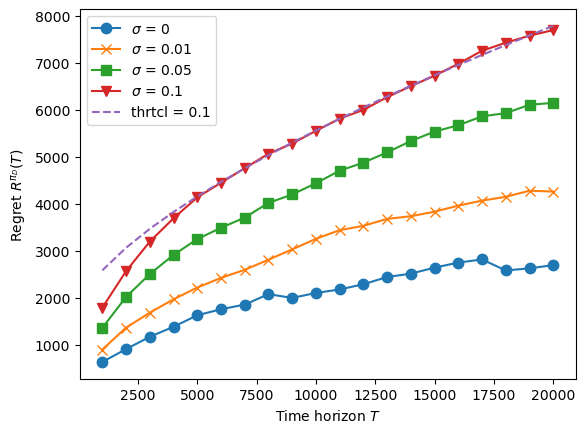

In [22]:
plot_regrets_all_noise_levels(2, noise_variance_list, plot_style, show_theoretical)

Fit co-effs [1 T^{2/3}] = [1142.386    9.063]


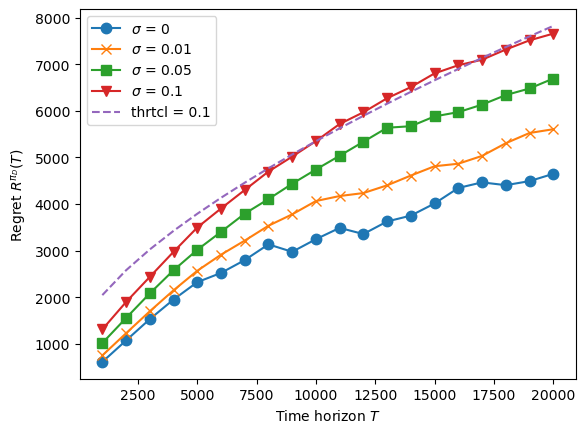

In [23]:
plot_regrets_all_noise_levels(4, noise_variance_list, plot_style, show_theoretical)

Fit co-effs [1 T^{2/3}] = [1640.226    6.646]


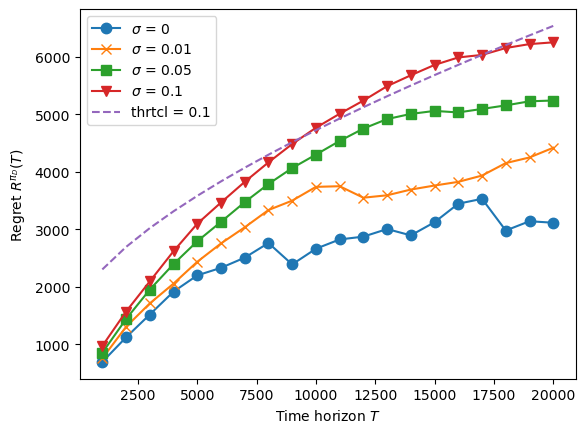

In [24]:
plot_regrets_all_noise_levels(6, noise_variance_list, plot_style, show_theoretical)

Fit co-effs [1 T^{2/3}] = [1142.386    9.063]


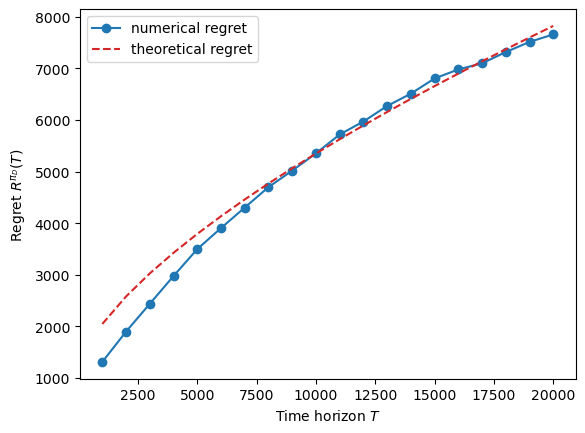

In [25]:
plot_theoretical_regret(4, 0.1)